In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.metrics import classification_report

In [2]:
dataset = pd.read_csv('Dataset/spanyol/tes_spanyol.csv')
dataset.head(10)

,HomeTeam,AwayTeam,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR,HTHG,HTAG,FTR
0,Betis,Levante,22.0,6.0,8.0,4.0,5.0,3.0,10.0,10.0,0.0,2.0,0.0,0.0,0.0,1.0,A
1,Girona,Valladolid,13.0,2.0,1.0,1.0,3.0,2.0,21.0,20.0,1.0,1.0,0.0,0.0,0.0,0.0,D
2,Barcelona,Alaves,25.0,3.0,9.0,0.0,7.0,1.0,6.0,13.0,0.0,2.0,0.0,0.0,0.0,0.0,H
3,Celta,Espanol,12.0,14.0,2.0,5.0,8.0,7.0,13.0,14.0,3.0,2.0,0.0,0.0,0.0,1.0,D
4,Villarreal,Sociedad,16.0,8.0,7.0,4.0,4.0,6.0,16.0,10.0,2.0,3.0,0.0,0.0,1.0,1.0,A
5,Eibar,Huesca,18.0,8.0,6.0,6.0,7.0,0.0,12.0,13.0,1.0,1.0,0.0,0.0,0.0,2.0,A
6,Real Madrid,Getafe,10.0,4.0,3.0,1.0,3.0,0.0,11.0,27.0,1.0,7.0,0.0,0.0,1.0,0.0,H
7,Vallecano,Sevilla,13.0,17.0,2.0,8.0,2.0,6.0,6.0,15.0,1.0,0.0,0.0,0.0,0.0,3.0,A
8,Ath Bilbao,Leganes,17.0,12.0,5.0,2.0,6.0,2.0,12.0,13.0,4.0,5.0,0.0,0.0,1.0,1.0,H
9,Valencia,Ath Madrid,13.0,9.0,4.0,3.0,4.0,10.0,10.0,15.0,2.0,3.0,0.0,0.0,0.0,1.0,D


In [3]:
le=LabelEncoder()
dataset['HomeTeam']=le.fit_transform(dataset['HomeTeam'])
dataset['AwayTeam']=le.fit_transform(dataset['AwayTeam'])
dataset['FTR']=le.fit_transform(dataset['FTR'])
dataset

,HomeTeam,AwayTeam,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR,HTHG,HTAG,FTR
0,8,29,22.0,6.0,8.0,4.0,5.0,3.0,10.0,10.0,0.0,2.0,0.0,0.0,0.0,1.0,0
1,22,50,13.0,2.0,1.0,1.0,3.0,2.0,21.0,20.0,1.0,1.0,0.0,0.0,0.0,0.0,1
2,7,0,25.0,3.0,9.0,0.0,7.0,1.0,6.0,13.0,0.0,2.0,0.0,0.0,0.0,0.0,2
3,13,17,12.0,14.0,2.0,5.0,8.0,7.0,13.0,14.0,3.0,2.0,0.0,0.0,0.0,1.0,1
4,52,45,16.0,8.0,7.0,4.0,4.0,6.0,16.0,10.0,2.0,3.0,0.0,0.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3342,28,3,11.0,21.0,3.0,6.0,2.0,9.0,12.0,17.0,5.0,2.0,0.0,0.0,2.0,1.0,1
3343,37,25,15.0,15.0,10.0,6.0,2.0,6.0,9.0,16.0,0.0,4.0,0.0,0.0,1.0,0.0,2
3344,47,27,4.0,11.0,1.0,4.0,1.0,6.0,19.0,11.0,2.0,0.0,0.0,0.0,0.0,1.0,0
3345,48,11,15.0,6.0,6.0,5.0,4.0,1.0,17.0,16.0,5.0,1.0,0.0,0.0,0.0,2.0,0


In [4]:
dataset

,HomeTeam,AwayTeam,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR,HTHG,HTAG,FTR
0,8,29,22.0,6.0,8.0,4.0,5.0,3.0,10.0,10.0,0.0,2.0,0.0,0.0,0.0,1.0,0
1,22,50,13.0,2.0,1.0,1.0,3.0,2.0,21.0,20.0,1.0,1.0,0.0,0.0,0.0,0.0,1
2,7,0,25.0,3.0,9.0,0.0,7.0,1.0,6.0,13.0,0.0,2.0,0.0,0.0,0.0,0.0,2
3,13,17,12.0,14.0,2.0,5.0,8.0,7.0,13.0,14.0,3.0,2.0,0.0,0.0,0.0,1.0,1
4,52,45,16.0,8.0,7.0,4.0,4.0,6.0,16.0,10.0,2.0,3.0,0.0,0.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3342,28,3,11.0,21.0,3.0,6.0,2.0,9.0,12.0,17.0,5.0,2.0,0.0,0.0,2.0,1.0,1
3343,37,25,15.0,15.0,10.0,6.0,2.0,6.0,9.0,16.0,0.0,4.0,0.0,0.0,1.0,0.0,2
3344,47,27,4.0,11.0,1.0,4.0,1.0,6.0,19.0,11.0,2.0,0.0,0.0,0.0,0.0,1.0,0
3345,48,11,15.0,6.0,6.0,5.0,4.0,1.0,17.0,16.0,5.0,1.0,0.0,0.0,0.0,2.0,0


In [5]:
X = dataset[dataset.columns[0:16]]
Y = dataset['FTR']

In [6]:
 # membagi dataset menjadi training dan testing 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [24]:
y_test.value_counts()

2    293
0    192
1    185
Name: FTR, dtype: int64

In [25]:
y_train.value_counts()

2    1159
1     820
0     698
Name: FTR, dtype: int64

In [7]:
grSpain = xgb.XGBClassifier(random_state=10)
grSpain.fit(X_train, y_train)
grSpain_pred = grSpain.predict(X_test)
print("pred", grSpain_pred)  #hasil prediksi 
print("tes", y_test)  #jawaban yang sebenarnya
print(metrics.accuracy_score(y_test, grSpain_pred) * 100)

pred [2 1 2 0 2 2 2 2 0 2 2 1 2 1 1 0 2 0 0 0 0 0 2 2 0 2 2 0 2 0 0 2 1 0 2 0 2
 2 2 2 0 0 1 2 1 2 2 0 2 1 2 0 1 2 1 1 0 2 1 1 2 2 1 1 2 2 1 0 0 1 2 2 2 2
 0 2 2 2 0 0 2 0 2 1 1 2 2 2 2 1 1 1 2 2 1 2 2 1 2 0 2 0 1 2 1 2 2 2 1 0 1
 0 2 2 2 2 2 1 2 2 2 2 2 2 0 0 2 1 1 1 1 2 1 2 1 0 1 1 2 0 1 2 1 2 2 2 0 2
 1 0 1 2 0 1 1 0 2 2 1 2 2 0 0 0 1 1 2 2 2 1 1 2 1 1 2 1 2 0 2 0 0 1 1 0 1
 1 0 0 0 2 1 0 0 0 1 0 2 0 2 2 2 0 2 2 1 2 1 0 2 1 2 2 0 1 1 0 2 0 0 2 2 0
 0 1 0 2 0 2 1 1 2 0 2 2 0 0 2 0 2 1 2 2 2 0 2 2 0 1 2 0 2 2 2 2 1 2 1 0 0
 0 1 2 0 0 2 0 2 1 2 2 2 1 0 2 2 2 0 2 2 2 1 2 2 0 2 2 1 1 1 1 2 2 1 0 2 1
 2 0 1 0 0 1 1 2 2 2 2 2 2 2 2 0 2 2 0 0 1 0 0 2 2 1 2 0 1 1 2 2 2 2 1 0 1
 1 1 2 1 0 1 0 2 1 1 1 2 2 0 1 1 2 2 0 0 0 1 2 2 1 2 2 0 0 1 2 0 2 2 1 0 1
 1 1 1 2 1 2 2 2 1 2 1 0 2 0 1 1 2 2 2 2 2 1 2 2 2 1 1 2 2 2 1 2 1 0 2 1 1
 2 0 1 2 1 0 1 0 0 2 0 2 0 1 0 2 0 0 2 2 0 2 0 2 0 1 2 1 1 2 2 0 2 1 2 1 1
 1 2 2 1 2 1 0 2 2 0 1 0 1 1 1 1 2 2 0 0 1 0 1 2 2 2 1 1 2 0 2 2 0 1 2 1 1
 1 2 0 2 2 2 0 0 2 0

In [8]:
print(classification_report(y_test,grSpain_pred))

              precision    recall  f1-score   support

           0       0.63      0.61      0.62       192
           1       0.42      0.43      0.43       185
           2       0.73      0.74      0.74       293

    accuracy                           0.62       670
   macro avg       0.59      0.59      0.59       670
weighted avg       0.62      0.62      0.62       670



In [9]:
lgbSpain = lgb.LGBMClassifier(random_state=10)
lgbSpain.fit(X_train, y_train)
lgbSpain_pred = lgbSpain.predict(X_test)
print(lgbSpain_pred)  #hasil prediksi 
print(y_test)  #jawaban yang sebenarnya
print(metrics.accuracy_score(y_test, lgbSpain_pred)*100)

[1 1 2 0 2 2 2 1 0 2 2 1 2 2 1 1 2 0 0 0 1 0 2 2 0 2 2 0 2 0 1 2 1 0 2 0 2
 2 2 2 0 0 1 2 1 2 2 1 2 1 1 0 1 2 1 1 0 2 1 1 2 2 1 1 2 2 1 0 0 1 2 2 2 2
 0 2 2 2 0 1 2 0 2 1 2 2 2 2 2 1 1 1 2 2 0 2 2 1 1 0 2 0 2 2 2 2 0 2 1 0 1
 0 2 2 2 2 2 0 2 2 2 2 2 2 0 0 2 1 1 2 1 2 0 2 1 0 1 0 2 0 1 2 1 2 2 0 0 2
 0 0 1 2 0 1 2 0 2 2 2 2 2 0 0 1 2 1 2 2 2 1 1 1 1 1 2 1 2 0 2 0 0 1 1 0 1
 1 0 0 0 2 1 0 0 0 1 2 2 0 2 2 2 0 2 2 1 2 1 0 2 1 2 2 0 1 1 0 2 0 0 2 2 0
 0 2 0 2 0 2 1 1 2 0 1 2 0 0 2 0 2 1 2 2 2 0 2 2 0 1 2 0 2 2 2 2 0 2 1 0 0
 0 1 2 0 0 2 0 2 2 2 2 0 1 0 2 2 2 0 2 2 2 1 2 2 0 1 2 1 0 2 1 0 2 0 0 2 1
 2 0 2 0 0 2 2 1 2 1 2 2 2 2 1 0 2 2 0 0 1 0 2 2 2 1 2 1 1 2 2 2 2 1 0 0 1
 1 1 2 2 0 1 0 2 2 1 1 2 2 0 1 0 2 2 0 1 0 1 2 2 1 2 2 0 0 0 2 0 2 2 1 0 1
 1 2 1 2 1 2 2 2 2 2 1 1 2 1 1 1 2 1 2 2 2 2 2 2 2 1 2 2 2 2 1 2 1 0 2 1 1
 2 2 1 2 0 0 1 0 0 2 0 2 0 1 0 2 0 0 2 2 0 2 1 2 0 0 2 1 1 2 2 0 2 1 2 1 2
 1 2 2 1 2 2 0 2 2 0 2 0 1 1 1 1 2 1 0 0 2 0 1 2 2 2 1 1 2 0 2 2 0 1 2 1 1
 2 2 0 2 2 2 0 0 1 0 0 2 

In [10]:
print(classification_report(y_test,lgbSpain_pred))

              precision    recall  f1-score   support

           0       0.63      0.64      0.63       192
           1       0.40      0.37      0.39       185
           2       0.71      0.73      0.72       293

    accuracy                           0.61       670
   macro avg       0.58      0.58      0.58       670
weighted avg       0.60      0.61      0.60       670



In [11]:
abSpain = AdaBoostClassifier(random_state=10, learning_rate=0.20)
abSpain.fit(X_train, y_train)
abSpain_pred = abSpain.predict(X_test)
print(abSpain_pred)  #hasil prediksi 
print(y_test)  #jawaban yang sebenarnya
print(metrics.accuracy_score(y_test, abSpain_pred)*100)

[2 0 2 2 2 2 2 2 0 2 2 1 2 1 1 0 2 0 0 0 1 0 2 2 1 2 2 1 2 0 2 2 0 0 0 0 2
 2 2 2 0 0 1 2 1 2 2 2 2 1 2 0 1 0 1 2 1 2 2 0 2 0 2 1 2 2 1 0 0 1 2 2 0 2
 0 2 2 2 0 2 2 0 2 1 2 2 2 2 2 2 1 1 2 2 0 2 2 1 0 0 2 0 2 2 1 2 1 2 2 0 1
 0 2 2 2 2 2 1 2 2 1 2 2 2 0 0 2 1 2 2 1 2 0 2 1 0 1 1 2 0 1 2 1 2 2 2 0 2
 0 0 1 2 0 0 2 1 1 2 2 2 2 0 0 1 2 1 2 2 2 1 1 1 0 1 2 1 2 0 2 0 0 2 1 0 1
 1 0 0 0 2 2 0 0 0 1 1 2 0 1 2 2 0 2 2 1 2 1 0 2 1 1 2 0 2 1 0 2 0 0 2 2 0
 0 2 1 2 0 1 0 0 2 0 2 1 0 1 2 0 2 1 2 2 2 0 2 2 0 1 2 0 2 2 1 2 1 2 1 0 0
 1 1 1 1 0 2 0 2 2 0 2 0 1 0 1 2 2 0 2 2 1 1 2 2 1 1 2 1 2 2 2 2 2 1 0 1 1
 2 0 2 0 1 2 2 1 2 2 2 2 2 2 2 2 1 2 1 0 1 0 1 2 2 2 2 1 0 2 2 0 2 2 0 0 1
 1 0 2 1 0 1 0 2 2 1 2 2 2 1 1 2 2 2 1 0 0 1 2 2 1 2 2 0 0 1 2 1 2 2 2 0 1
 2 2 1 2 1 2 2 1 2 2 1 0 2 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 0 2 2 0
 2 2 2 2 0 0 1 0 0 2 1 2 0 0 1 1 0 0 2 2 0 2 2 2 0 2 2 2 1 2 2 0 2 2 2 1 2
 0 2 2 2 2 1 0 2 2 0 1 1 2 0 2 1 1 1 0 0 2 0 1 2 2 2 1 1 2 0 2 2 1 1 2 1 1
 2 2 0 2 2 2 1 0 0 0 0 2 

In [12]:
print(classification_report(y_test,abSpain_pred))

              precision    recall  f1-score   support

           0       0.68      0.62      0.65       192
           1       0.46      0.42      0.44       185
           2       0.71      0.80      0.75       293

    accuracy                           0.64       670
   macro avg       0.62      0.61      0.61       670
weighted avg       0.63      0.64      0.64       670



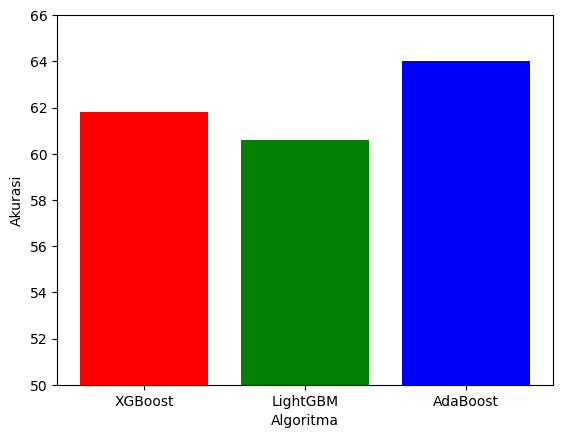

In [13]:
import matplotlib.pyplot as plt

# Data hasil akurasi algoritma
algoritma = ['XGBoost', 'LightGBM', 'AdaBoost']
akurasi = [61.791044776119406, 60.59701492537314, 64.02985074626866]

# Warna untuk setiap batang
colors = ['red', 'green', 'blue']

# Membuat diagram batang dengan warna yang ditentukan
plt.bar(algoritma, akurasi, color=colors)

# Memberikan judul dan label sumbu
#plt.title('Hasil Akurasi Dengan Data Liga Spanyol')
plt.xlabel('Algoritma')
plt.ylabel('Akurasi')

# Mengatur batas sumbu y pada rentang 0 hingga 100
plt.ylim(50, 66)

# Menampilkan diagram batang
plt.show()

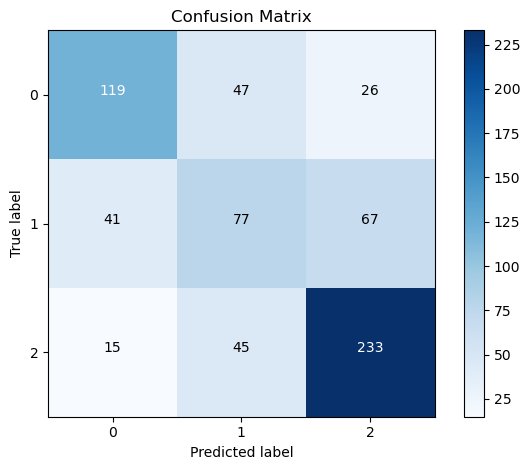

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Contoh data prediksi dengan 3 kelas (0, 1, 2)
y_true = [1, 0, 2, 1, 0, 2]
y_pred = [1, 0, 0, 1, 2, 2]

# Menghitung confusion matrix
cm = confusion_matrix(y_test, abSpain_pred)

# Membuat grafik confusion matrix
classes = np.unique(y_true)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

# Menambahkan label ke matriks
thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

In [15]:
print("Model XGBoost\n", confusion_matrix(y_test, grSpain_pred))
print("\n")
print("Model LightGBM\n", confusion_matrix(y_test, lgbSpain_pred))
print("\n")
print("Model AdaBoost\n", confusion_matrix(y_test, abSpain_pred))

Model XGBoost
 [[117  56  19]
 [ 46  79  60]
 [ 24  51 218]]


Model LightGBM
 [[122  49  21]
 [ 48  69  68]
 [ 23  55 215]]


Model AdaBoost
 [[119  47  26]
 [ 41  77  67]
 [ 15  45 233]]


In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Menghitung akurasi
accuracy = accuracy_score(y_test, abSpain_pred)

# Menghitung presisi untuk masing-masing kelas
precision = precision_score(y_test, abSpain_pred, average=None)

# Menghitung recall untuk masing-masing kelas
recall = recall_score(y_test, abSpain_pred, average=None)

# Menghitung F1-score untuk masing-masing kelas
f1 = f1_score(y_test, abSpain_pred, average=None)

print("AdaBoost")
print("Akurasi:", accuracy)
print("Presisi:", precision)
print("Recall:", recall)
print("F1-score:", f1)

AdaBoost
Akurasi: 0.6402985074626866
Presisi: [0.68       0.4556213  0.71472393]
Recall: [0.61979167 0.41621622 0.79522184]
F1-score: [0.64850136 0.43502825 0.75282714]


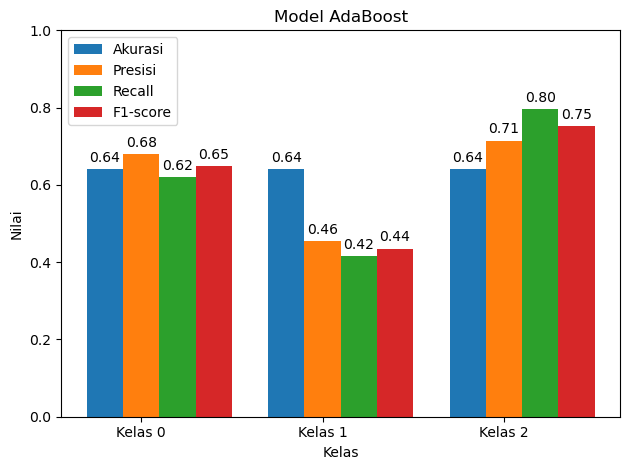

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Contoh nilai akurasi, presisi, recall, dan F1-score untuk 3 kelas
accuracy = 0.6402985074626866
precision = [0.68, 0.4556213, 0.71472393]
recall = [0.61979167, 0.41621622, 0.79522184]
f1 = [0.64850136, 0.43502825, 0.75282714]

# Daftar label kelas
labels = ['Kelas 0', 'Kelas 1', 'Kelas 2']

# Membuat grafik
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots()
rects_accuracy = ax.bar(x, accuracy, width, label='Akurasi')
rects_precision = ax.bar(x + width, precision, width, label='Presisi')
rects_recall = ax.bar(x + 2 * width, recall, width, label='Recall')
rects_f1 = ax.bar(x + 3 * width, f1, width, label='F1-score')

# Menambahkan label dan judul grafik
ax.set_ylabel('Nilai')
ax.set_xlabel('Kelas')
ax.set_title('Model AdaBoost')
ax.set_xticks(x + width)
ax.set_xticklabels(labels)
ax.legend()

# Menambahkan nilai pada setiap bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points',
                    ha='center', va='bottom')

autolabel(rects_accuracy)
autolabel(rects_precision)
autolabel(rects_recall)
autolabel(rects_f1)

plt.ylim([0, 1.0])
plt.tight_layout()
plt.show()

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Menghitung akurasi
accuracy = accuracy_score(y_test, grSpain_pred)

# Menghitung presisi untuk masing-masing kelas
precision = precision_score(y_test, grSpain_pred, average=None)

# Menghitung recall untuk masing-masing kelas
recall = recall_score(y_test, grSpain_pred, average=None)

# Menghitung F1-score untuk masing-masing kelas
f1 = f1_score(y_test, grSpain_pred, average=None)

print("XGBoost")
print("Akurasi:", accuracy)
print("Presisi:", precision)
print("Recall:", recall)
print("F1-score:", f1)

XGBoost
Akurasi: 0.6179104477611941
Presisi: [0.62566845 0.42473118 0.73400673]
Recall: [0.609375   0.42702703 0.7440273 ]
F1-score: [0.61741425 0.42587601 0.73898305]


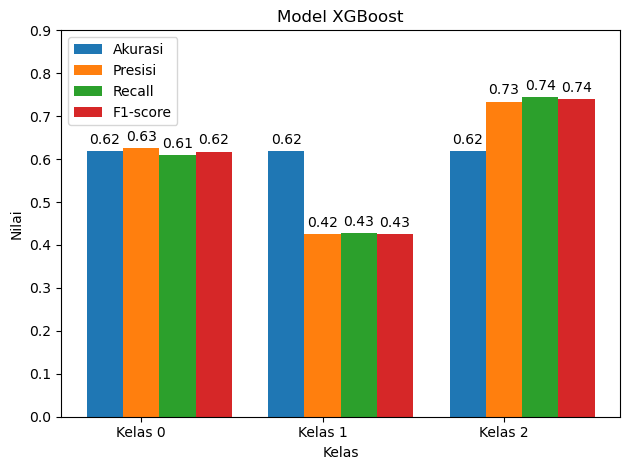

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Contoh nilai akurasi, presisi, recall, dan F1-score untuk 3 kelas
accuracy = 0.6179104477611941
precision = [0.62566845, 0.42473118, 0.73400673]
recall = [0.609375, 0.42702703, 0.7440273]
f1 = [0.61741425, 0.42587601, 0.73898305]

# Daftar label kelas
labels = ['Kelas 0', 'Kelas 1', 'Kelas 2']

# Membuat grafik
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots()
rects_accuracy = ax.bar(x, accuracy, width, label='Akurasi')
rects_precision = ax.bar(x + width, precision, width, label='Presisi')
rects_recall = ax.bar(x + 2 * width, recall, width, label='Recall')
rects_f1 = ax.bar(x + 3 * width, f1, width, label='F1-score')

# Menambahkan label dan judul grafik
ax.set_ylabel('Nilai')
ax.set_xlabel('Kelas')
ax.set_title('Model XGBoost')
ax.set_xticks(x + width)
ax.set_xticklabels(labels)
ax.legend()

# Menambahkan nilai pada setiap bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points',
                    ha='center', va='bottom')

autolabel(rects_accuracy)
autolabel(rects_precision)
autolabel(rects_recall)
autolabel(rects_f1)

plt.ylim([0, 0.9])
plt.tight_layout()
plt.show()

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Menghitung akurasi
accuracy = accuracy_score(y_test, lgbSpain_pred)

# Menghitung presisi untuk masing-masing kelas
precision = precision_score(y_test, lgbSpain_pred, average=None)

# Menghitung recall untuk masing-masing kelas
recall = recall_score(y_test, lgbSpain_pred, average=None)

# Menghitung F1-score untuk masing-masing kelas
f1 = f1_score(y_test, lgbSpain_pred, average=None)

print("LightGBM")
print("Akurasi:", accuracy)
print("Presisi:", precision)
print("Recall:", recall)
print("F1-score:", f1)

LightGBM
Akurasi: 0.6059701492537314
Presisi: [0.63212435 0.39884393 0.70723684]
Recall: [0.63541667 0.37297297 0.7337884 ]
F1-score: [0.63376623 0.38547486 0.72026801]


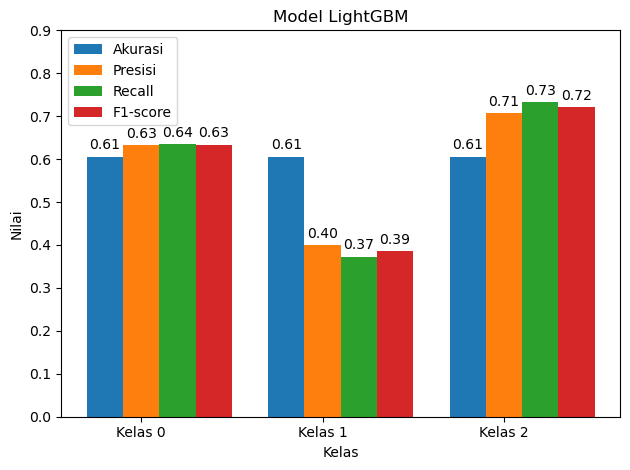

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Contoh nilai akurasi, presisi, recall, dan F1-score untuk 3 kelas
accuracy = 0.6059701492537314
precision = [0.63212435, 0.39884393, 0.70723684]
recall = [0.63541667, 0.37297297, 0.7337884]
f1 = [0.63376623, 0.38547486, 0.72026801]

# Daftar label kelas
labels = ['Kelas 0', 'Kelas 1', 'Kelas 2']

# Membuat grafik
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots()
rects_accuracy = ax.bar(x, accuracy, width, label='Akurasi')
rects_precision = ax.bar(x + width, precision, width, label='Presisi')
rects_recall = ax.bar(x + 2 * width, recall, width, label='Recall')
rects_f1 = ax.bar(x + 3 * width, f1, width, label='F1-score')

# Menambahkan label dan judul grafik
ax.set_ylabel('Nilai')
ax.set_xlabel('Kelas')
ax.set_title('Model LightGBM')
ax.set_xticks(x + width)
ax.set_xticklabels(labels)
ax.legend()

# Menambahkan nilai pada setiap bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points',
                    ha='center', va='bottom')

autolabel(rects_accuracy)
autolabel(rects_precision)
autolabel(rects_recall)
autolabel(rects_f1)

plt.ylim([0, 0.9])
plt.tight_layout()
plt.show()

MENYIMPAN MODEL

In [22]:
import pickle

In [23]:
filename = 'spain.sav'
pickle.dump(abSpain, open(filename, 'wb'))